# 基于贝叶斯的学生成绩预测

## 1. 引言

随着数据科学的快速发展，利用统计学模型进行学生成绩预测已经成为教育领域的热门研究方向。通过分析学生的各类特征（如性别、年龄、系别等），可以更好地理解影响学生成绩的因素，进而帮助学校制定个性化的教育方案。本报告基于一个包含学生性别、年龄、系别、学习成绩等信息的数据集，提出并应用贝叶斯概率模型进行成绩预测。

## 2. 背景假设

我们认为学生成绩应当符合统计学假设。具体而言，不同考试卷子具有不同的难度分布，且每个学生的能力分布也有所不同。根据这一假设，不同学科和系别的学生在学习成绩上的分布会有所不同，因此我们可以基于贝叶斯定理进行模型推断，估计学生成绩的分布，并进行有效预测。

## 3. 数据集介绍

该数据集包括了多种学生特征信息，包括但不限于：
	•	性别：学生的性别可能与其成绩有一定的关系。
	•	年龄：年龄可能与学生的学习经验和心理成熟度相关。
	•	系别：不同系别的学生面对的课程难度及学习环境可能不同。
	•	成绩：学生的学习成绩，作为预测目标变量。

通过这些特征，我们可以构建一个用于预测学生成绩的模型。

## 4. 探索性数据分析（EDA）

在进行建模之前，我们首先进行数据的探索性分析，以便更好地理解数据的分布和潜在的关联性。以下是我们对数据集的初步分析：
	•	性别与成绩的关系：通过可视化和统计分析，探索性别是否对学生成绩有显著影响。
	•	年龄与成绩的关系：查看学生的年龄分布，以及不同年龄段学生成绩的表现。
	•	系别与成绩的关系：不同系别的学生可能在课程内容和难度上有所不同，因此成绩的分布可能呈现不同的模式。
	•	缺失值处理：分析数据中是否存在缺失值，并采取适当的方法进行处理。

## 5. 基于贝叶斯的预测模型

在探索性数据分析的基础上，我们将利用贝叶斯定理构建预测模型。贝叶斯定理提供了一种通过先验知识与现有数据进行更新的方式，适用于处理不确定性和缺失信息的情境。

我们将设定以下假设：
	•	先验分布：对于每个系别和其他特征，我们设定先验分布，假设学生成绩的分布是已知的。
	•	似然函数：通过观测到的数据（如学生的性别、年龄、系别等），我们构建似然函数来描述数据与模型之间的关系。
	•	后验分布：结合先验分布和似然函数，我们可以计算出后验分布，并基于此预测学生的成绩。

## 6. 结论与下一步

在完成数据预处理与贝叶斯模型训练后，我们将评估模型的性能，并与其他预测方法进行对比。最终，我们将根据预测结果为教育管理者提供参考建议，以帮助其优化教育资源配置，提升学生成绩。

本报告的下一步将包括模型的实际应用与进一步的分析，以期实现更加精准的学生成绩预测。

In [16]:
# 导入所需库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import itertools
import warnings

warnings.filterwarnings('ignore')

# 按年级划分训练集
grade_models = {}

# 设置中文显示 (Mac系统)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac系统支持的字体
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv("./student_data.csv")

# 数据探索
print("数据基本信息:")
print(df.info())
print("\n数据统计摘要:")
print(df.describe())

# 检查缺失值
print("\n缺失值数量:")
print(df.isnull().sum())

# 查看各系别、年级、性别的学生分布
print("\n各系别学生数量:")
print(df['Programme'].value_counts())

print("\n各年级学生数量:")
print(df['Grade'].value_counts())

print("\n各性别学生数量:")
print(df['Gender'].value_counts())

print("\n各系别年级性别组合的学生数量:")
print(df.groupby(['Programme', 'Grade', 'Gender']).size())


数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      466 non-null    int64  
 1   Gender     466 non-null    int64  
 2   Grade      466 non-null    int64  
 3   Q1         466 non-null    int64  
 4   Q2         466 non-null    int64  
 5   Q3         466 non-null    int64  
 6   Q4         466 non-null    float64
 7   Q5         466 non-null    int64  
 8   Programme  466 non-null    object 
 9   Total      466 non-null    float64
dtypes: float64(2), int64(7), object(1)
memory usage: 36.5+ KB
None

数据统计摘要:
            Index      Gender       Grade          Q1          Q2          Q3  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean   233.500000    1.641631    2.062232    6.633047    3.832618   10.740343   
std    134.666873    0.480037    0.241836    2.197873    2.428746    4.124822   
min   

接下来是学生的得分情况

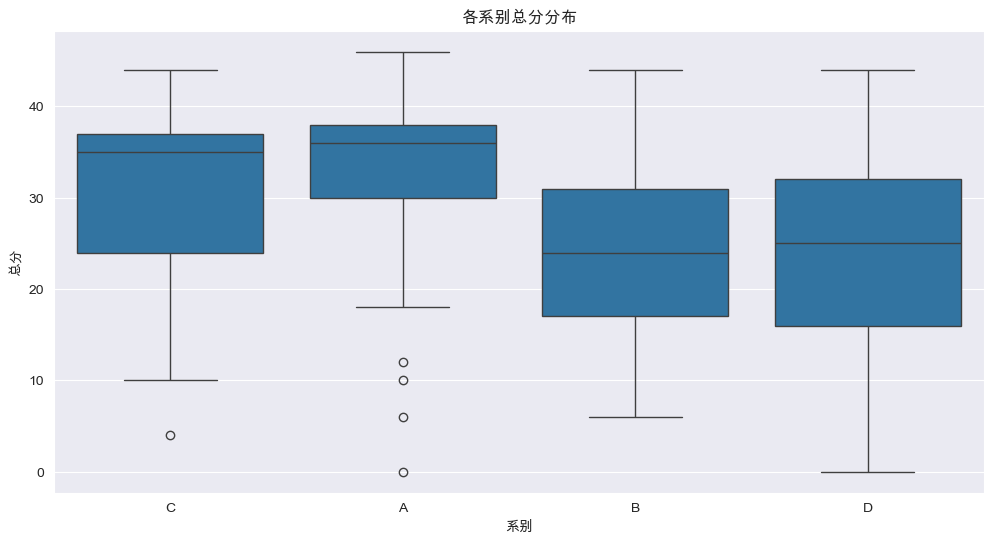

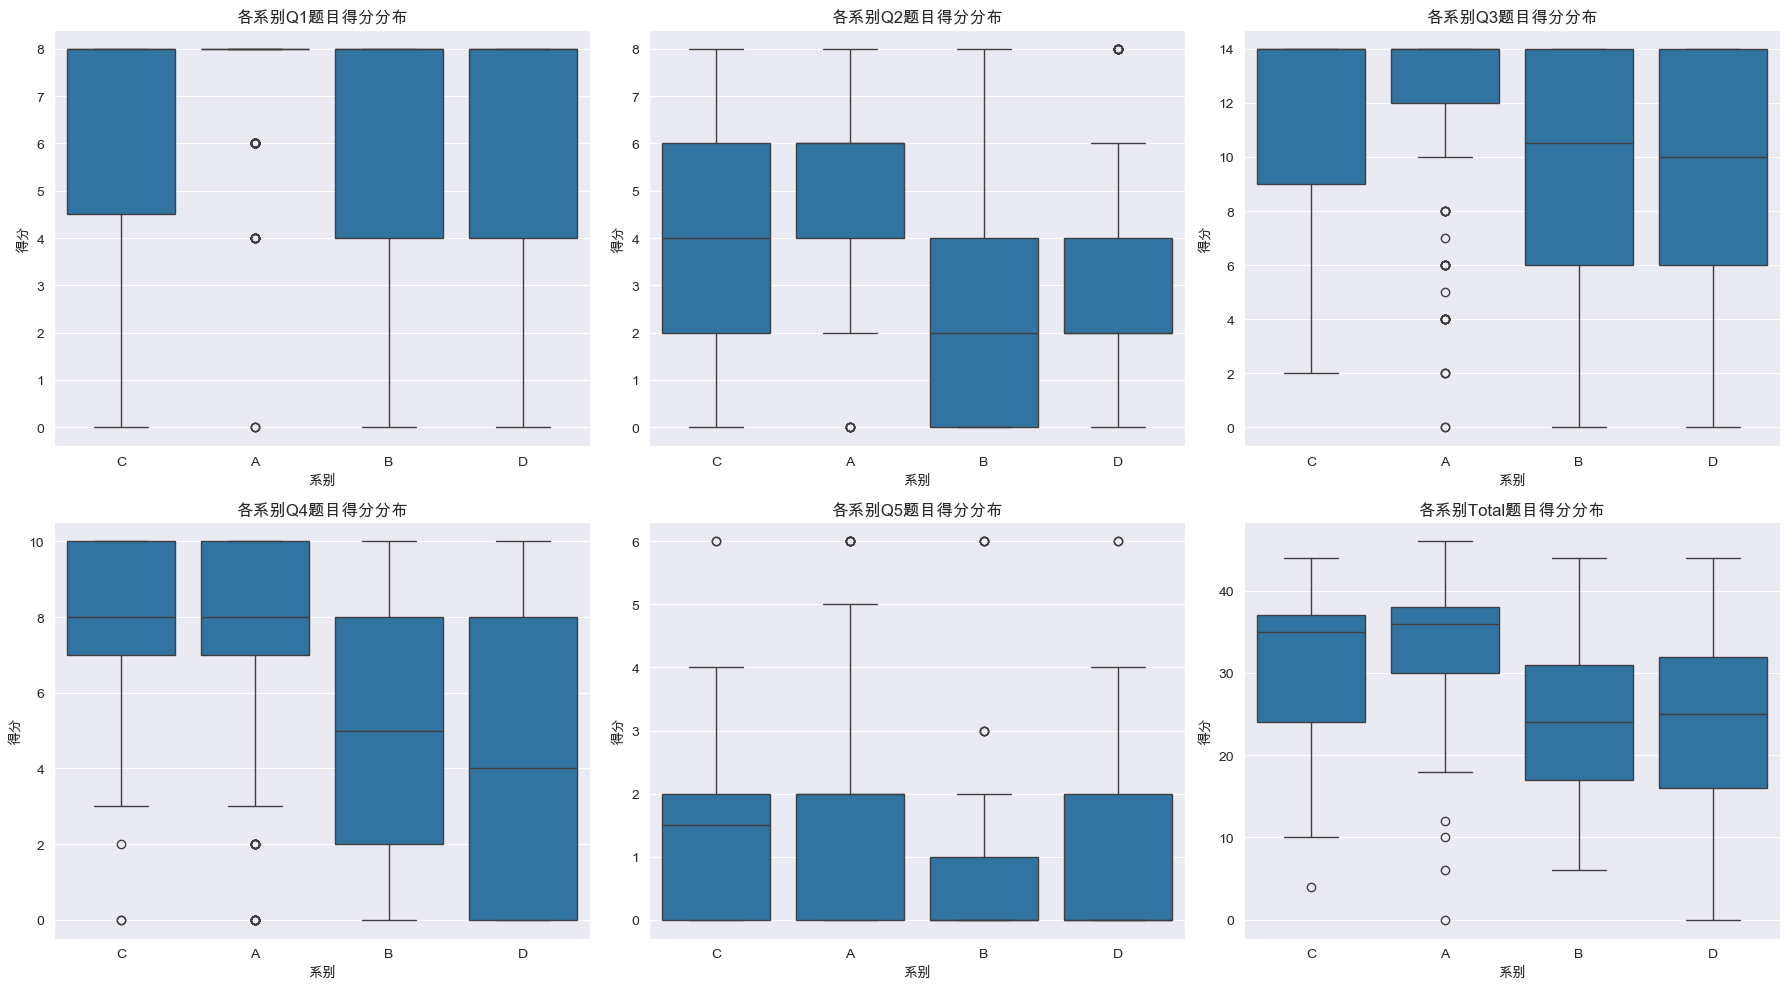

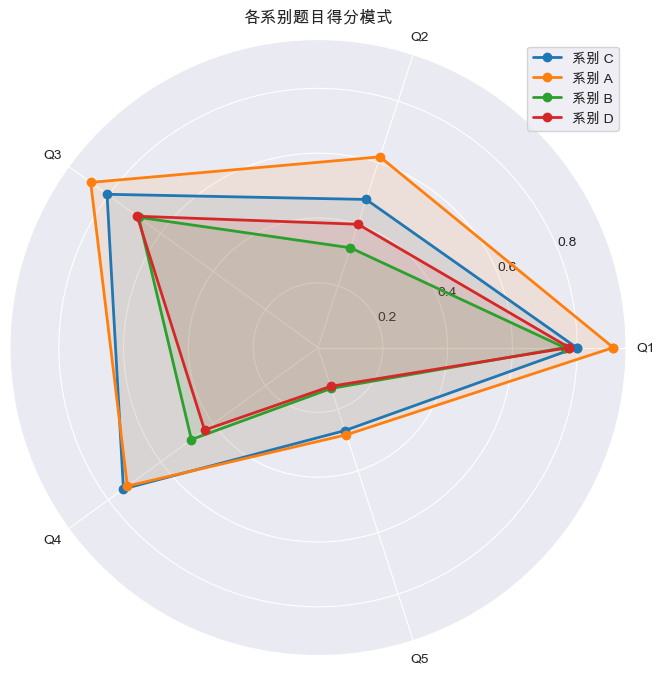

In [17]:

# 数据可视化：各系别总分分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='Programme', y='Total', data=df)
plt.title('各系别总分分布')
plt.xlabel('系别')
plt.ylabel('总分')
plt.show()

# 各系别各题目得分分布
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Total']):
    sns.boxplot(x='Programme', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'各系别{col}题目得分分布')
    axes[i].set_xlabel('系别')
    axes[i].set_ylabel('得分')

plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# 准备雷达图数据
categories = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
programmes = df['Programme'].unique()

# 创建雷达图
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# 设置角度
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

for p in programmes:
    # 计算该系的平均分
    stats = df[df['Programme'] == p][categories].mean() / np.array([8, 8, 14, 10, 6])  # 归一化
    stats = np.concatenate((stats, [stats[0]]))

    # 绘制该系的雷达线
    ax.plot(angles, stats, 'o-', linewidth=2, label=f'系别 {p}')
    ax.fill(angles, stats, alpha=0.1)

# 设置雷达图属性
ax.set_thetagrids(angles[:-1] * 180 / np.pi, categories)
ax.set_title('各系别题目得分模式')
ax.legend(loc='upper right')
plt.show()

## 2. 特征差异性分析

在学生成绩的预测过程中，各系别的特征差异性是一个重要的考虑因素。由于不同的学科和考试卷子具有不同的难度分布，不同系别的学生在面对这些考试时，其得分的概率分布（PDF）也可能存在显著差异。这些差异可能源于以下几个因素：
	1.	课程难度：不同系别的课程内容和考试难度不同。例如，理工科类的学生可能面临更为复杂的数学题目，而文科类的学生则更多地涉及写作和理解类的题目。这些差异会导致各系别学生在考试中的得分分布呈现不同的特征。
	2.	学生能力差异：不同系别的学生可能具有不同的学习背景和能力分布。例如，某些系别的学生可能在基础知识掌握上更为扎实，而其他系别的学生则可能在某些领域表现得更为突出。这些能力差异会影响每个系别学生的得分分布。
	3.	考试题目类型：不同学科的考试题目类型有所差异，如选择题、填空题、简答题等，这也会影响不同系别学生的答题表现，从而导致得分分布的不同。

为了更好地预测学生的成绩，我们将首先分析各系别的得分分布。通过为每个系别拟合一个特定的概率密度函数（PDF），我们能够更准确地描述各系别学生成绩的分布特性。我们将采用以下步骤：
	•	拟合各系别的PDF：通过数据分析和分布拟合，我们为每个系别的学生成绩构建一个概率分布模型。这些PDF将反映各系别学生在考试中的得分模式。
	•	贝叶斯预测模型：基于这些系别的PDF分布，我们将利用贝叶斯定理构建一个概率模型，预测一个学生所属的系别。该模型可以根据学生的成绩信息和其他特征，推断其最有可能属于哪个系别。
同时，使用 AIC（Akaike Information Criterion） 作为评价标准的原因，主要是因为它可以帮助你在模型的拟合度与复杂度之间找到一个平衡点。具体来说，AIC 是一个用于模型选择的标准，它考虑了模型的拟合度和自由参数的数量，从而帮助选择在解释数据的同时不过度复杂化的模型。

AIC 的计算公式为：

$AIC = 2k - 2 \ln(L)$

其中：
	•	k 是模型的自由参数数量（即模型的复杂度）。
	•	L 是模型的似然函数值（即模型对数据的拟合度）。


跳过样本量不足的组合: 年级 3, 系别 A, 样本数 1
跳过样本量不足的组合: 年级 3, 系别 B, 样本数 1
跳过样本量不足的组合: 年级 3, 系别 D, 样本数 1

有效的年级-系别组合数: 4
年级 3, 系别 C, Q1: 最佳拟合分布 双峰高斯混合, AIC: -119.1130
年级 3, 系别 C, Q2: 最佳拟合分布 双峰高斯混合, AIC: 125.5378
年级 3, 系别 C, Q3: 最佳拟合分布 右偏双峰对数正态, AIC: -138.8585
年级 3, 系别 C, Q4: 最佳拟合分布 双峰高斯混合, AIC: 125.6125
年级 3, 系别 C, Q5: 最佳拟合分布 双峰高斯混合, AIC: 107.2183
年级 3, 系别 C, Total: 最佳拟合分布 右偏双峰对数正态, AIC: 28.3493
年级 2, 系别 A, Q1: 最佳拟合分布 双峰高斯混合, AIC: -1306.2929
年级 2, 系别 A, Q2: 最佳拟合分布 双峰高斯混合, AIC: 804.6132
年级 2, 系别 A, Q3: 最佳拟合分布 双峰高斯混合, AIC: 715.5967
年级 2, 系别 A, Q4: 最佳拟合分布 双峰高斯混合, AIC: 850.3390
年级 2, 系别 A, Q5: 最佳拟合分布 双峰高斯混合, AIC: -0.4688
年级 2, 系别 A, Total: 最佳拟合分布 双峰高斯混合, AIC: 1226.3733
年级 2, 系别 D, Q1: 最佳拟合分布 双峰高斯混合, AIC: -540.3015
年级 2, 系别 D, Q2: 最佳拟合分布 双峰高斯混合, AIC: 738.5044
年级 2, 系别 D, Q3: 最佳拟合分布 双峰高斯混合, AIC: 68.4180
年级 2, 系别 D, Q4: 最佳拟合分布 双峰高斯混合, AIC: 827.5861
年级 2, 系别 D, Q5: 最佳拟合分布 双峰高斯混合, AIC: -871.9161
年级 2, 系别 D, Total: 最佳拟合分布 双峰高斯混合, AIC: 1187.0817
年级 2, 系别 B, Q1: 最佳拟合分布 双峰高斯混合, AIC: 381.0069
年级 2, 系别 B, Q2: 最佳拟合分

<Figure size 1400x800 with 0 Axes>

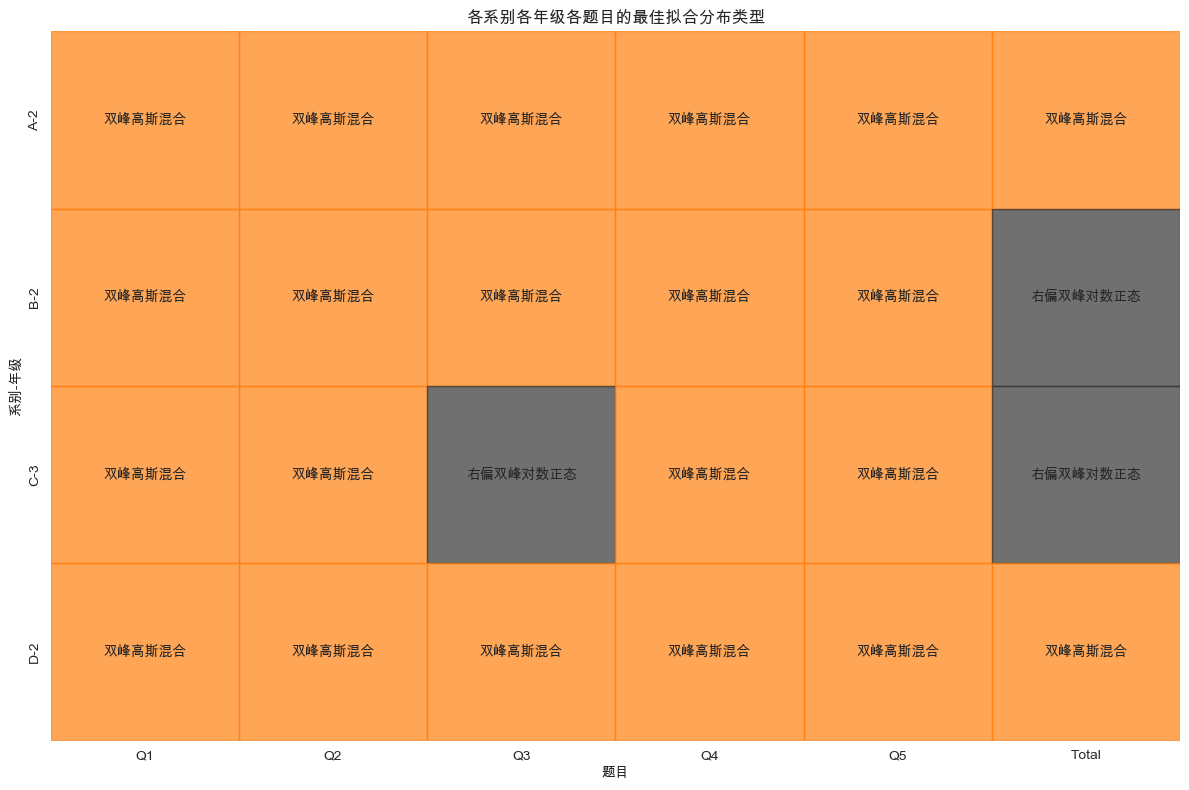


双峰高斯混合的典型案例:
年级: 3, 系别: C, 题目: Q1


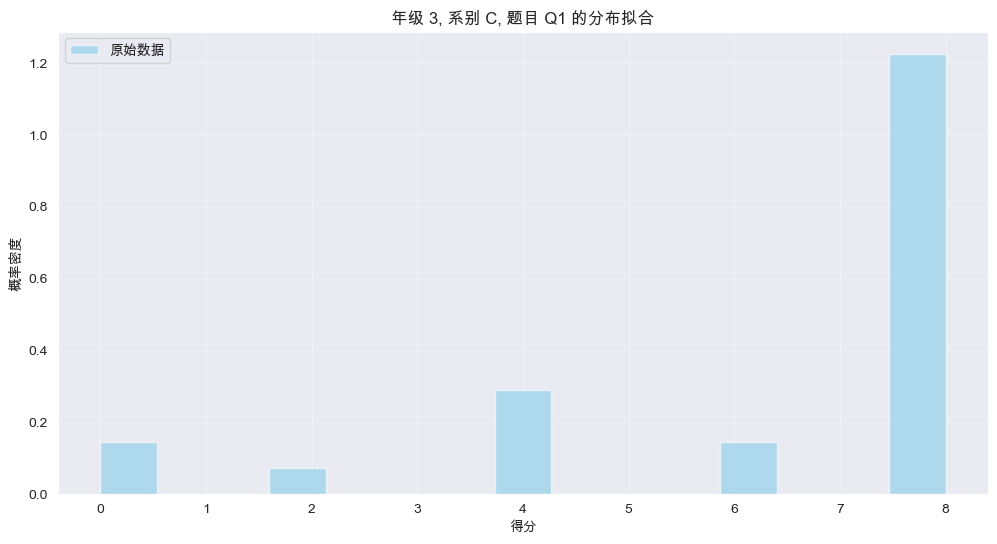

未找到对数正态的典型案例
未找到Gamma的典型案例
未找到双峰对数正态的典型案例


In [34]:
# 扩展分布拟合分析（添加更多分布类型）
results_extended = []
valid_combinations = []
min_sample_size = 10  # 设置一个更高的最小样本量阈值

for grade in df['Grade'].unique():
    grade_data = df[df['Grade'] == grade]

    for programme in grade_data['Programme'].unique():
        prog_data = grade_data[grade_data['Programme'] == programme]
        sample_count = len(prog_data)

        if sample_count >= min_sample_size:
            valid_combinations.append((grade, programme))
        else:
            print(f"跳过样本量不足的组合: 年级 {grade}, 系别 {programme}, 样本数 {sample_count}")

print(f"\n有效的年级-系别组合数: {len(valid_combinations)}")

for grade, programme in valid_combinations:
    prog_data = df[(df['Grade'] == grade) & (df['Programme'] == programme)]
    for col in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Total']:
        data = prog_data[col].dropna().values

        if len(data) <= 5:  # 样本太少，跳过
            continue

        # Beta分布需要归一化的数据 (0-1范围)
        if col == 'Q1' or col == 'Q2':
            data_normalized = data / 8.0  # Q1, Q2满分8分
        elif col == 'Q3':
            data_normalized = data / 14.0  # Q3满分14分
        elif col == 'Q4':
            data_normalized = data / 10.0  # Q4满分10分
        elif col == 'Q5':
            data_normalized = data / 6.0  # Q5满分6分
        elif col == 'Total':
            data_normalized = data / 46.0  # Total满分46分

        data_reshp = data.reshape(-1, 1)
        models = {}
        aic_scores = {}

        # 1. 拟合单峰正态分布
        try:
            params_norm = stats.norm.fit(data)
            aic_norm = 2 * 2 + 2 * (-np.sum(stats.norm.logpdf(data, *params_norm)))
            models['单峰正态'] = params_norm
            aic_scores['单峰正态'] = aic_norm
        except:
            pass

        # 2. 拟合双峰高斯混合模型
        try:
            gmm = GaussianMixture(n_components=2, random_state=42)
            gmm.fit(data_reshp)
            aic_gmm = 2 * 6 + 2 * (-gmm.score(data_reshp) * len(data))  # 6个参数：2均值+2方差+2权重
            models['双峰高斯混合'] = gmm
            aic_scores['双峰高斯混合'] = aic_gmm
        except:
            pass

        # 3. 拟合对数正态分布 (双向)
        if np.all(data > 0):
            try:
                # 3.1 标准对数正态分布（右偏）
                params_lognorm = stats.lognorm.fit(data)
                aic_lognorm = 2 * 3 + 2 * (-np.sum(stats.lognorm.logpdf(data, *params_lognorm)))
                models['右偏对数正态'] = params_lognorm
                aic_scores['右偏对数正态'] = aic_lognorm
            except:
                pass

        # 3.2 反向对数正态分布（左偏）
        max_val = np.max(data)
        if np.all(max_val - data > 0):
            try:
                reversed_data = max_val - data + 1  # 将数据反转并确保全为正值
                params_rev_lognorm = stats.lognorm.fit(reversed_data)
                aic_rev_lognorm = 2 * 3 + 2 * (-np.sum(stats.lognorm.logpdf(reversed_data, *params_rev_lognorm)))
                models['左偏对数正态'] = params_rev_lognorm
                aic_scores['左偏对数正态'] = aic_rev_lognorm
            except:
                pass

        # 4. 拟合Gamma分布 (仅对正值有效)
        if np.all(data > 0):
            try:
                params_gamma = stats.gamma.fit(data)
                aic_gamma = 2 * 3 + 2 * (-np.sum(stats.gamma.logpdf(data, *params_gamma)))
                models['Gamma'] = params_gamma
                aic_scores['Gamma'] = aic_gamma
            except:
                pass

        # 5. 拟合Beta分布 (仅对[0,1]区间的值有效)
        if np.all(data_normalized >= 0) and np.all(data_normalized <= 1):
            try:
                # 确保数据在(0,1)之间，避免极端值
                beta_data = np.clip(data_normalized, 0.001, 0.999)
                params_beta = stats.beta.fit(beta_data)
                aic_beta = 2 * 4 + 2 * (-np.sum(stats.beta.logpdf(beta_data, *params_beta)))
                models['Beta'] = params_beta
                aic_scores['Beta'] = aic_beta
            except:
                pass

                # 6.1 拟合右偏双峰对数正态��合模型

        # 6.1 拟合右偏双峰对数正态混合模型
        if np.all(data > 0):
            try:
                # 先将数据取对数，然后拟合高斯混合模型
                log_data = np.log(data).reshape(-1, 1)
                gmm_log = GaussianMixture(n_components=2, random_state=42)
                gmm_log.fit(log_data)
                aic_gmm_log = 2 * 6 + 2 * (-gmm_log.score(log_data) * len(data))
                models['右偏双峰对数正态'] = gmm_log
                aic_scores['右偏双峰对数正态'] = aic_gmm_log
            except:
                pass

        # 6.2 拟合左偏双峰对数正态混合模型
        max_val = np.max(data)
        if np.all(max_val - data > 0):
            try:
                # 将数据反转并确保全为正值，再取对数
                reversed_data = max_val - data + 1
                log_reversed_data = np.log(reversed_data).reshape(-1, 1)

                # 拟合高斯混合模型
                gmm_log_rev = GaussianMixture(n_components=2, random_state=42)
                gmm_log_rev.fit(log_reversed_data)
                aic_gmm_log_rev = 2 * 6 + 2 * (-gmm_log_rev.score(log_reversed_data) * len(data))
                models['左偏双峰对数正态'] = gmm_log_rev
                aic_scores['左偏双峰对数正态'] = aic_gmm_log_rev
            except:
                pass

        # 找出AIC最低的模型
        if aic_scores:
            best_model_name = min(aic_scores, key=aic_scores.get)
            best_aic = aic_scores[best_model_name]

            results_extended.append([grade, programme, col, best_model_name, best_aic])
            print(f"年级 {grade}, 系别 {programme}, {col}: 最佳拟合分布 {best_model_name}, AIC: {best_aic:.4f}")

# 将扩展的拟合结果转换为DataFrame
results_extended_df = pd.DataFrame(results_extended, columns=['Grade', 'Programme', 'Question', 'Best_Model', 'AIC'])

# 可视化扩展后的拟合结果
plt.figure(figsize=(14, 8))
best_extended_models = results_extended_df.pivot_table(index=['Programme', 'Grade'], columns='Question',
                                                       values='Best_Model',
                                                       aggfunc=lambda x: x.iloc[0] if len(x) > 0 else None)

# 创建颜色映射
model_palette = {
    '单峰正态': '#1f77b4',
    '双峰高斯混合': '#ff7f0e',
    '对数正态': '#2ca02c',
    'Gamma': '#d62728',
    'Beta': '#9467bd',
    '双峰对数正态': '#8c564b'
}

# 创建颜色编码矩阵
color_matrix = best_extended_models.applymap(lambda x: model_palette.get(x, '#333333') if x else '#eeeeee')

plt.figure(figsize=(12, 8))
ax = sns.heatmap(pd.notna(best_extended_models), cmap='binary',
                 cbar=False, annot=best_extended_models, fmt='')

# 设置热图单元格颜色
for i in range(len(color_matrix.index)):
    for j in range(len(color_matrix.columns)):
        if pd.notna(best_extended_models.iloc[i, j]):
            ax.add_patch(plt.Rectangle((j, i), 1, 1,
                                       color=color_matrix.iloc[i, j],
                                       fill=True, alpha=0.7))

plt.title('各系别各年级各题目的最佳拟合分布类型')
plt.xlabel('题目')
plt.ylabel('系别-年级')
plt.tight_layout()
plt.show()


# 可视化比较函数
def visualize_distribution_fits(grade, programme, question):
    from scipy import stats
    data = df[(df['Grade'] == grade) & (df['Programme'] == programme)][question].dropna().values

    if len(data) < 5:
        print(f"数据太少，无法可视化")
        return

    x = np.linspace(min(data) * 0.8, max(data) * 1.2, 1000)

    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=15, density=True, alpha=0.6, color='skyblue', label='原始数据')

    # 拟合并绘制各种分布
    if np.all(data > 0):
        # 正态分布
        try:
            params_norm = stats.norm.fit(data)
            plt.plot(x, stats.norm.pdf(x, *params_norm), 'r-', label='正态分布')
        except Exception as e:
            print(f"正态分布拟合失败: {e}")

        # 右偏对数正态分布
        try:
            params_lognorm = stats.lognorm.fit(data)
            plt.plot(x, stats.lognorm.pdf(x, *params_lognorm), 'g--', label='右偏对数正态')
        except Exception as e:
            print(f"右偏对数正态拟合失败: {e}")

        # 左偏对数正态分布
        try:
            max_val = np.max(data)
            if np.all(max_val - data > 0):
                reversed_data = max_val - data + 1
                params_rev_lognorm = stats.lognorm.fit(reversed_data)
                rev_x = max_val - x + 1
                rev_pdf = stats.lognorm.pdf(rev_x, *params_rev_lognorm)
                pdf = rev_pdf[::-1]
                plt.plot(x, pdf, 'c:', label='左偏对数正态')
        except Exception as e:
            print(f"左偏对数正态拟合失败: {e}")

        # Gamma分布
        try:
            params_gamma = stats.gamma.fit(data)
            plt.plot(x, stats.gamma.pdf(x, *params_gamma), 'm-.', label='Gamma分布')
        except Exception as e:
            print(f"Gamma分布拟合失败: {e}")

        # 双峰高斯混合
        try:
            gmm = GaussianMixture(n_components=2, random_state=42)
            gmm.fit(data.reshape(-1, 1))
            gmm_x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
            gmm_y = np.exp(gmm.score_samples(gmm_x))
            plt.plot(gmm_x, gmm_y, 'b-', label='双峰高斯混合')
        except Exception as e:
            print(f"双峰高斯混合拟合失败: {e}")

        # 右偏双峰对数正态混合
        try:
            if np.all(data > 0):
                log_data = np.log(data).reshape(-1, 1)
                gmm_log = GaussianMixture(n_components=2, random_state=42)
                gmm_log.fit(log_data)
                x_vals = np.linspace(min(data), max(data), 1000)
                log_x = np.log(x_vals).reshape(-1, 1)
                log_pdf = np.exp(gmm_log.score_samples(log_x))
                pdf = log_pdf / x_vals
                plt.plot(x_vals, pdf, 'y-', label='右偏双峰对数正态')
        except Exception as e:
            print(f"右偏双峰对数正态拟合失败: {e}")

        # 左偏双峰对数正态混合
        try:
            max_val = np.max(data)
            if np.all(max_val - data > 0):
                reversed_data = max_val - data + 1
                log_reversed_data = np.log(reversed_data).reshape(-1, 1)
                gmm_log_rev = GaussianMixture(n_components=2, random_state=42)
                gmm_log_rev.fit(log_reversed_data)
                x_vals = np.linspace(min(data), max(data), 1000)
                reversed_x = max_val - x_vals + 1
                log_reversed_x = np.log(reversed_x).reshape(-1, 1)
                log_pdf = np.exp(gmm_log_rev.score_samples(log_reversed_x))
                pdf = log_pdf / reversed_x
                pdf = pdf[::-1]
                plt.plot(x_vals, pdf, 'm--', label='左偏双峰对数正态')
        except Exception as e:
            print(f"左偏双峰对数正态拟合失败: {e}")

    plt.title(f'年级 {grade}, 系别 {programme}, 题目 {question} 的分布拟合')
    plt.xlabel('得分')
    plt.ylabel('概率密度')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


# 找出每种分布类型的典型案例进行可视化展示
for model_type in ['双峰高斯混合', '对数正态', 'Gamma', '双峰对数正态']:
    try:
        sample = results_extended_df[results_extended_df['Best_Model'] == model_type].iloc[0]
        print(f"\n{model_type}的典型案例:")
        print(f"年级: {sample['Grade']}, 系别: {sample['Programme']}, 题目: {sample['Question']}")
        visualize_distribution_fits(sample['Grade'], sample['Programme'], sample['Question'])
    except IndexError:
        print(f"未找到{model_type}的典型案例")

### 3. 题目得分模式分析
基于贝叶斯构建不同年级的预测模型，同时进行交叉验证

In [19]:
# 基于贝叶斯构建不同年级的预测模型
# 创建特征工程函数
def create_features(df_input, with_interactions=True):
    X = df_input[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Gender']]

    # 添加交互特征
    if with_interactions:
        # 添加比例特征
        esp = 0.0000001
        for i, j in itertools.combinations(range(1, 6), 2):
            X[f'Q{i}_to_Q{j}'] = df_input[f'Q{i}'] / (df_input[f'Q{j}'] + esp)

        # 添加统计特征
        X['mean'] = df_input[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].mean(axis=1)
        X['std'] = df_input[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].std(axis=1)
        X['max_min_diff'] = df_input[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].max(axis=1) - df_input[
            ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].min(axis=1)

    # 将Gender转为数值型
    X['Gender'] = X['Gender'].astype(int)

    return X


# 按年级分别建模
results_by_grade = {}
feature_importances = {}
confusion_matrices = {}

for grade in df['Grade'].unique():
    grade_df = df[df['Grade'] == grade]
    if grade_df.size < 30:  # 数据不足，跳过
        continue

    # 特征工程
    X = create_features(grade_df)
    y = grade_df['Programme']

    # 过滤掉样本数量太少的类别
    programme_counts = y.value_counts()
    valid_programmes = programme_counts[programme_counts >= 3].index  # 至少需要3个样本
    if len(valid_programmes) < 2:  # 需要至少2个有效类别
        print(f"年级 {grade} 没有足够的样本数量，跳过")
        continue

    mask = y.isin(valid_programmes)
    X = X[mask]
    y = y[mask]

    # 使用交叉验证代替简单的训练测试集分割
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(f_classif, k=min(10, X.shape[1]))),
        ('classifier', GaussianNB())
    ])

    # 训练与评估
    cv_scores = []
    all_y_pred = []
    all_y_true = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        cv_scores.append((y_pred == y_test).mean())

        all_y_pred.extend(y_pred)
        all_y_true.extend(y_test)

    # 计算平均准确率
    accuracy = np.mean(cv_scores)
    results_by_grade[grade] = accuracy

    # 保存混淆矩阵
    confusion_matrices[grade] = confusion_matrix(all_y_true, all_y_pred)

    # 训练完整模型获取特征重要性
    pipeline.fit(X, y)
    selected_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)
    selected_features = X.columns[selected_indices]
    feature_scores = pipeline.named_steps['feature_selection'].scores_[selected_indices]
    feature_importances[grade] = dict(zip(selected_features, feature_scores))

    print(f"\n年级 {grade} 的系别预测准确率: {accuracy:.4f}")
    print(f"年级 {grade} 的分类报告:")
    print(classification_report(all_y_true, all_y_pred))
    print(f"最重要的特征: {selected_features.tolist()}")

年级 3 没有足够的样本数量，跳过

年级 2 的系别预测准确率: 0.5356
年级 2 的分类报告:
              precision    recall  f1-score   support

           A       0.60      0.82      0.69       188
           B       0.30      0.15      0.20        87
           D       0.49      0.41      0.45       162

    accuracy                           0.54       437
   macro avg       0.46      0.46      0.45       437
weighted avg       0.50      0.54      0.50       437

最重要的特征: ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q1_to_Q2', 'Q1_to_Q4', 'Q1_to_Q5', 'Q3_to_Q5', 'mean']


### 4. 构建预测模型
基于学生得分模式预测所属系别：

In [20]:
# 导入必要的库
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap

# 设置随机种子确保结果可复现
np.random.seed(42)


# 定义特征工程函数
def create_advanced_features(df_input):
    eps = 0.0000001
    # 基础特征
    X = df_input[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Gender']]

    # 题目得分比例特征
    for i in range(1, 6):
        for j in range(i + 1, 6):
            X[f'Q{i}_to_Q{j}'] = df_input[f'Q{i}'] / (df_input[f'Q{j}'] + eps)

    # 统计特征
    X['mean_score'] = df_input[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].mean(axis=1)
    X['std_score'] = df_input[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].std(axis=1)
    X['range_score'] = df_input[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].max(axis=1) - df_input[
        ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].min(axis=1)
    X['cv_score'] = X['std_score'] / (X['mean_score'] + eps)  # 变异系数

    # 归一化题目分数（考虑题目满分不同）
    max_scores = [8, 8, 14, 10, 6]  # 每题满分
    for i in range(1, 6):
        X[f'Q{i}_norm'] = df_input[f'Q{i}'] / max_scores[i - 1]

    return X


# 准备数据
X = create_advanced_features(df)
y = df['Programme']

### 模型选择和训练


In [21]:
# 按年级分别训练模型
for grade in df['Grade'].unique():
    print(f"\n开始训练年级 {grade} 的模型")
    grade_df = df[df['Grade'] == grade]

    X_grade = create_advanced_features(grade_df)
    y_grade = grade_df['Programme']

    # 检查样本量
    programme_counts = y_grade.value_counts()
    valid_programmes = programme_counts[programme_counts >= 5].index
    if len(valid_programmes) < 2:
        print(f"年级 {grade} 的有效系别数量不足，跳过")
        continue

    # 过滤有效系别
    mask = y_grade.isin(valid_programmes)
    X_grade = X_grade[mask]
    y_grade = y_grade[mask]

    # 交叉验证
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 创建模型
    rf = RandomForestClassifier(random_state=42)
    gb = GradientBoostingClassifier(random_state=42)

    # 超参数网格
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }

    # 网格搜索
    grid_rf = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='accuracy')
    grid_rf.fit(X_grade, y_grade)

    # 保存最佳模型
    grade_models[grade] = {
        'model': grid_rf.best_estimator_,
        'features': X_grade.columns,
        'accuracy': grid_rf.best_score_,
        'best_params': grid_rf.best_params_
    }

    print(f"年级 {grade} 模型训练完成，最佳准确率: {grid_rf.best_score_:.4f}")
    print(f"最佳参数: {grid_rf.best_params_}")


开始训练年级 3 的模型
年级 3 的有效系别数量不足，跳过

开始训练年级 2 的模型
年级 2 模型训练完成，最佳准确率: 0.5288
最佳参数: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


### 3. 模型评估


年级 2 模型评估结果:
              precision    recall  f1-score   support

           A       0.90      0.98      0.94        57
           B       0.92      0.88      0.90        26
           D       0.98      0.90      0.94        49

    accuracy                           0.93       132
   macro avg       0.93      0.92      0.93       132
weighted avg       0.93      0.93      0.93       132



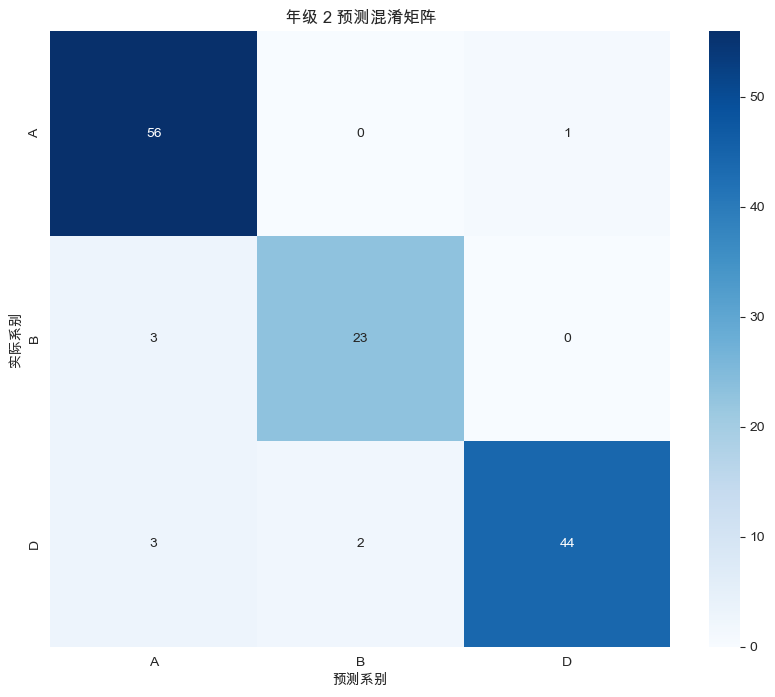

In [53]:
# 评估所有模型
for grade, model_info in grade_models.items():
    model = model_info['model']
    grade_df = df[df['Grade'] == grade]

    # 创建特征
    X_grade = create_advanced_features(grade_df)
    y_grade = grade_df['Programme']

    # 过滤有效系别
    programme_counts = y_grade.value_counts()
    valid_programmes = programme_counts[programme_counts >= 5].index
    mask = y_grade.isin(valid_programmes)
    X_grade = X_grade[mask]
    y_grade = y_grade[mask]

    # 分割测试集
    X_train, X_test, y_train, y_test = train_test_split(
        X_grade, y_grade, test_size=0.3, random_state=42, stratify=y_grade
    )

    # 预测并评估
    y_pred = model.predict(X_test)
    print(f"\n年级 {grade} 模型评估结果:")
    print(classification_report(y_test, y_pred))

    # 混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(valid_programmes),
                yticklabels=sorted(valid_programmes))
    plt.title(f'年级 {grade} 预测混淆矩阵')
    plt.xlabel('预测系别')
    plt.ylabel('实际系别')
    plt.show()

### 4. 特征重要性和模型解释

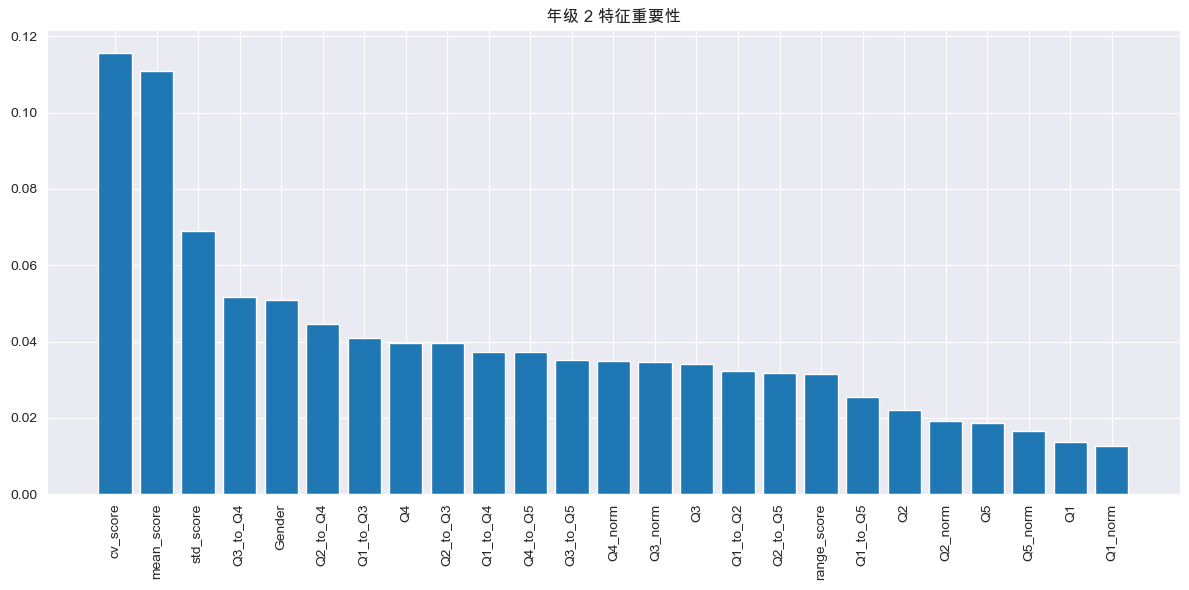

<Figure size 1200x600 with 0 Axes>

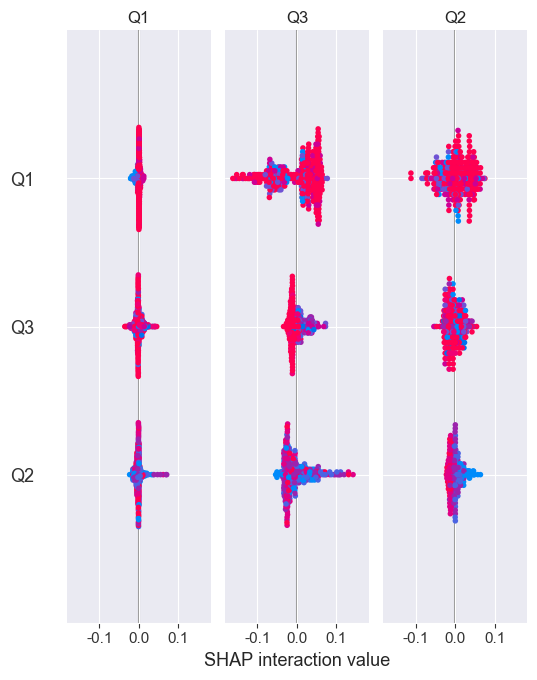

In [23]:
# 分析特征重要性
for grade, model_info in grade_models.items():
    model = model_info['model']
    features = model_info['features']

    # 特征重要性
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(f'年级 {grade} 特征重要性')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), np.array(features)[indices], rotation=90)
    plt.tight_layout()
    plt.show()

    # SHAP值分析
    grade_df = df[df['Grade'] == grade]
    X_grade = create_advanced_features(grade_df)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_grade)

    # 绘制SHAP摘要图
    plt.figure(figsize=(12, 6))
    shap.summary_plot(shap_values, X_grade, feature_names=features)
    plt.show()

### 5. 贝叶斯预测演示
测试预训练的贝叶斯模型在典型学生案例上的预测效果


贝叶斯预测演示:
学生得分: [4, 0, 0, 0, 2], 年级: 2, 性别: 2
预测系别: D (❌ 错误), 预期系别: A
各系别概率: A: 0.1107, B: 0.3460, D: 0.5433

学生得分: [8, 2, 2, 0, 0], 年级: 2, 性别: 2
预测系别: D (✅ 正确), 预期系别: D
各系别概率: A: 0.1647, B: 0.0664, D: 0.7689

学生得分: [8, 2, 2, 7, 1], 年级: 2, 性别: 2
预测系别: A (✅ 正确), 预期系别: A
各系别概率: A: 0.7119, B: 0.1804, D: 0.1077

学生得分: [8, 6, 14, 10, 3], 年级: 2, 性别: 2
预测系别: A (✅ 正确), 预期系别: A
各系别概率: A: 0.9834, B: 0.0026, D: 0.0141

学生得分: [8, 6, 14, 8, 0], 年级: 2, 性别: 2
预测系别: A (✅ 正确), 预期系别: A
各系别概率: A: 0.5887, B: 0.0662, D: 0.3451

学生得分: [8, 6, 12, 5, 2], 年级: 2, 性别: 2
预测系别: A (❌ 错误), 预期系别: C
各系别概率: A: 0.6548, B: 0.1726, D: 0.1726



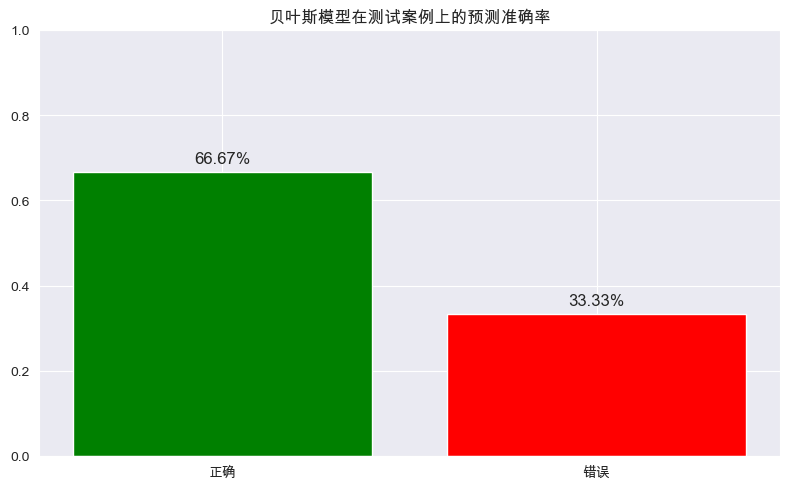

In [30]:
def predict_programme_with_bayes(scores, grade, gender):
    """
    使用训练好的贝叶斯模型预测某个学生的专业归属概率。

    参数:
        scores (list): 学生的各科成绩（与训练时特征一致��
        grade (int): 学生所在年级
        gender (int): 学生性别（假设1=男，2=女）

    返回:
        dict: 各个专业的概率分布，例如 {'A': 0.6, 'B': 0.3, 'C': 0.1}
    """
    # 检查给定年级是否有模型
    if grade not in grade_models:
        print(f"警告：年级 {grade} 没有训练模型")
        return {}

    # 获取对应年级的模型
    model_info = grade_models[grade]
    model = model_info['model']

    # 构建输入特征
    eps = 0.0000001  # 防止除零错误

    # 创建特征字典
    feature_dict = {
        'Q1': scores[0], 'Q2': scores[1], 'Q3': scores[2],
        'Q4': scores[3], 'Q5': scores[4], 'Gender': gender
    }

    # 计算比例特征
    for i in range(1, 6):
        for j in range(i + 1, 6):
            feature_dict[f'Q{i}_to_Q{j}'] = scores[i - 1] / (scores[j - 1] + eps)

    # 计算统计特征
    feature_dict['mean_score'] = np.mean(scores)
    feature_dict['std_score'] = np.std(scores)
    feature_dict['range_score'] = max(scores) - min(scores)
    feature_dict['cv_score'] = feature_dict['std_score'] / (feature_dict['mean_score'] + eps)

    # 计算归一化分数
    max_scores = [8, 8, 14, 10, 6]  # 每题满分
    for i in range(1, 6):
        feature_dict[f'Q{i}_norm'] = scores[i - 1] / max_scores[i - 1]

    # 转换为模型可用的特征向量
    X_input = pd.DataFrame([feature_dict])

    # 确保特征顺序与训练时一致
    feature_cols = model_info['features']
    X_input = X_input[feature_cols]

    # 获取模型支持的有效系别
    grade_df = df[df['Grade'] == grade]
    programme_counts = grade_df['Programme'].value_counts()
    valid_programmes = programme_counts[programme_counts >= 5].index.tolist()

    # 获取预测概率
    probs_array = model.predict_proba(X_input)

    # 将概率与对应类别组合
    classes = model.classes_
    probs_dict = {cls: prob for cls, prob in zip(classes, probs_array[0])}

    return probs_dict


# 测试案例
test_cases = [
    {'scores': [4, 0, 0, 0, 2], 'grade': 2, 'gender': 2, 'expected': 'A'},  # 低分A系学生
    {'scores': [8, 2, 2, 0, 0], 'grade': 2, 'gender': 2, 'expected': 'D'},  # 高分D系学生
    {'scores': [8, 2, 2, 7, 1], 'grade': 2, 'gender': 2, 'expected': 'A'},  # 中分A系学生
    {'scores': [8, 6, 14, 10, 3], 'grade': 2, 'gender': 2, 'expected': 'A'},  # A系学生
    {'scores': [8, 6, 14, 8, 0], 'grade': 2, 'gender': 2, 'expected': 'A'},
    {'scores': [8, 6, 12, 5, 2], 'grade': 2, 'gender': 2, 'expected': 'C'}
]

print("\n贝叶斯预测演示:")
correct_count = 0
total_cases = len(test_cases)

for case in test_cases:
    probs = predict_programme_with_bayes(case['scores'], case['grade'], case['gender'])

    if not probs:
        print(f"⚠️ 预测失败: {case}")
        continue

    predicted = max(probs, key=probs.get)
    is_correct = predicted == case['expected']

    print(f"学生得分: {case['scores']}, 年级: {case['grade']}, 性别: {case['gender']}")
    print(f"预测系别: {predicted} ({'✅ 正确' if is_correct else '❌ 错误'}), 预期系别: {case['expected']}")
    print(f"各系别概率: {', '.join([f'{k}: {v:.4f}' for k, v in probs.items()])}")
    print()

    correct_count += is_correct

# 计算准确率
accuracy = correct_count / total_cases if total_cases else 0

# 可视化
plt.figure(figsize=(8, 5))
plt.bar(['正确', '错误'], [accuracy, 1 - accuracy], color=['green', 'red'])
plt.xticks(['正确', '错误'])
plt.title('贝叶斯模型在测试案例上的预测准确率')
plt.ylim(0, 1)
plt.text(0, accuracy + 0.02, f'{accuracy:.2%}', ha='center', fontsize=12, fontweight='bold')
plt.text(1, (1 - accuracy) + 0.02, f'{1 - accuracy:.2%}', ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### 6. 在验证数据集上检验贝叶斯预测模型
验证预训练贝叶斯模型在独立测试集上的性能表现

验证数据集样本数量: 466
检测到系别使用数字编码，进行转换...
系别转换后的分布: 
Programme
A    189
D    163
B     88
C     26
Name: count, dtype: int64

年级 2 验证样本数: 466
年级 2 预测准确率: 0.8455 (394/466)

总体准确率: 0.8455 (394/466)


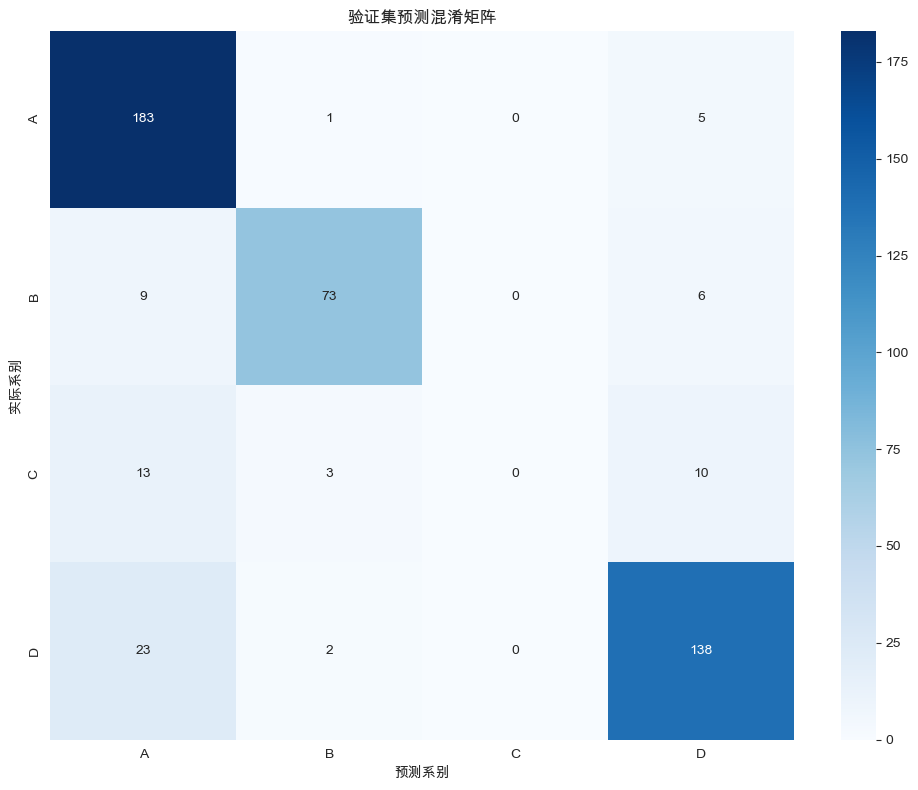

In [62]:
# 导入测试数据
test_df = pd.read_csv('./test_data.csv')
print(f"验证数据集样本数量: {len(test_df)}")

# 系别映射（如果需要）
mapping = {'1': 'A', '2': 'B', '3': 'C', '4': 'D'}

# 检查是否需要转换系别编码
if test_df['Programme'].dtype == 'int64' or test_df['Programme'].iloc[0] in ['1', '2', '3', '4']:
    print("检测到系别使用数字编码，进行转换...")
    test_df['Programme'] = test_df['Programme'].astype(str).map(mapping)
    print(f"系别转换后的分布: \n{test_df['Programme'].value_counts()}")

# 初始化结果列表
results = {
    'actual': [],
    'predicted': [],
    'correct': [],
    'probabilities': [],
    'grade': [],
    'gender': []
}

# 按年级分组进行验证
for grade in sorted(test_df['Grade'].unique()):
    grade_test = test_df[test_df['Grade'] == grade]
    print(f"\n年级 {grade} 验证样本数: {len(grade_test)}")

    # 如果该年级没有训练模型，则跳过
    if grade not in grade_models:
        print(f"⚠️ 年级 {grade} 没有训练好的模型，跳过")
        continue

    correct_count = 0
    total_count = 0

    for _, student in grade_test.iterrows():
        scores = [student['Q1'], student['Q2'], student['Q3'], student['Q4'], student['Q5']]
        gender = student['Gender']
        actual_programme = student['Programme']

        # 预测系别
        probs = predict_programme_with_bayes(scores, grade, gender)

        if not probs:
            print(f"⚠️ 预测失败: 年级={grade}, 得分={scores}, 性别={gender}")
            continue

        predicted = max(probs, key=probs.get)
        is_correct = predicted == actual_programme

        # 保存结果
        results['actual'].append(actual_programme)
        results['predicted'].append(predicted)
        results['correct'].append(is_correct)
        results['probabilities'].append(probs)
        results['grade'].append(grade)
        results['gender'].append(gender)

        correct_count += is_correct
        total_count += 1

    # 计算该年级���准确率
    grade_accuracy = correct_count / total_count if total_count > 0 else 0
    print(f"年级 {grade} 预测准确率: {grade_accuracy:.4f} ({correct_count}/{total_count})")

# 计算总体准确率
overall_accuracy = sum(results['correct']) / len(results['correct']) if results['correct'] else 0
print(f"\n总体准确率: {overall_accuracy:.4f} ({sum(results['correct'])}/{len(results['correct'])})")

# 创建混淆矩阵 - 使用集合并集而非列表相加
all_programmes = sorted(list(set(results['actual']) | set(results['predicted'])))
cm = confusion_matrix(results['actual'], results['predicted'], labels=all_programmes)

# 绘制混淆矩阵热图
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=all_programmes,
            yticklabels=all_programmes)
plt.title('验证集预测混淆矩阵')
plt.xlabel('预测系别')
plt.ylabel('实际系别')
plt.tight_layout()
plt.show()